# COMP41680 Assignment 2: Text Scraping & Clustering

    Kamran Azmat  
    16204691
    kamran.azmat@ucdconnect.ie

The objective of this assignment is to scrape a corpus of news articles from a set of web pages, pre-process the corpus, and then to apply unsupervised clustering algorithms to explore and summarise the contents of the corpus.

    URL: http://mlg.ucd.ie/modules/COMP41680/news/index.html
    Script for scrapping data: text_data_scraping.py
    
[Note: run the above script to generate data]

### Importing important packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import operator

from operator import itemgetter
from collections import Counter
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import ward, dendrogram

from sklearn.cluster import AgglomerativeClustering

## Part 2: 1(a) Loading Corpus

Define the directory name were the articles are stored

In [2]:
DIRNAME = 'articles'

Load corpus from the articles directory


In [3]:
import os

article_title = []
raw_documents = []

for file in os.listdir(DIRNAME):
    path = DIRNAME + "/" + file
    f = open(path, "r", encoding = 'utf-8')
    raw_documents.append(f.read())
    article_title.append(file.rstrip(".txt"))

In [4]:
print("Read %d raw text documents" % len(raw_documents))

Read 1131 raw text documents


In [5]:
# Example
print(article_title[0] + ":")
print(raw_documents[0])

article-aug-1576:
Mourinho receives Robson warningSir Bobby Robson has offered Chelsea boss Jose Mourinho some advice on coping under pressure.The pair worked together at Barcelona and Porto and Robson had a word of warning for his protege. "It has all gone for him just lately and that is marvellous, but sometimes you have to have a bit of humility and learn how to lose," said Robson. "It is when it goes against you and you get a bit of bad luck that you learn, and he'll get it straight." Robson was speaking after being formally granted the freedom of the city of Newcastle. "Jose is doing very well at the moment," Robson added of the man who worked for him for six years. "He has got one pot - possibly two to follow - a big game against Barcelona to come and I cannot see them losing their lead in the Premiership. "They are in a good position and I would expect them to go on and win it, which is a wonderful achievement."What has occurred over the last couple of weeks will stand him in ve

## Part 2: 1(b) Pre-processing

All words are modified, stemmed, dropped and the output is the raw data ("words") which will be used for the analysis.

Standard Tasks in Pre-processing:
- Tokenisation & Normalisation
- Fixing spellings
- Stemming, Lemmatisation, POS tagging
- Removing stop words

### Tokenising and Normalising Text
    Normalising is converting the words to lower case

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
tokenize = CountVectorizer().build_tokenizer()

# convert to lowercase (Normalisation), then tokenise 
tokens = []
for article in raw_documents:
    tokens.append(tokenize(article.lower()))

In [7]:
# Example after tokenising and normalisation
print(article_title[0])
print(tokens[0])
print("length:", len(tokens[0]))

article-aug-1576
['mourinho', 'receives', 'robson', 'warningsir', 'bobby', 'robson', 'has', 'offered', 'chelsea', 'boss', 'jose', 'mourinho', 'some', 'advice', 'on', 'coping', 'under', 'pressure', 'the', 'pair', 'worked', 'together', 'at', 'barcelona', 'and', 'porto', 'and', 'robson', 'had', 'word', 'of', 'warning', 'for', 'his', 'protege', 'it', 'has', 'all', 'gone', 'for', 'him', 'just', 'lately', 'and', 'that', 'is', 'marvellous', 'but', 'sometimes', 'you', 'have', 'to', 'have', 'bit', 'of', 'humility', 'and', 'learn', 'how', 'to', 'lose', 'said', 'robson', 'it', 'is', 'when', 'it', 'goes', 'against', 'you', 'and', 'you', 'get', 'bit', 'of', 'bad', 'luck', 'that', 'you', 'learn', 'and', 'he', 'll', 'get', 'it', 'straight', 'robson', 'was', 'speaking', 'after', 'being', 'formally', 'granted', 'the', 'freedom', 'of', 'the', 'city', 'of', 'newcastle', 'jose', 'is', 'doing', 'very', 'well', 'at', 'the', 'moment', 'robson', 'added', 'of', 'the', 'man', 'who', 'worked', 'for', 'him', 'for

### Removing stop words

In [8]:
# load English stop words
from sklearn.feature_extraction import text
stopwords = text.ENGLISH_STOP_WORDS

for i in range (0, len(tokens)):
    filtered_token = []
    for token in tokens[i]:
        if token not in stopwords:
            filtered_token.append(token)
    tokens[i] = filtered_token

In [9]:
# Example after removing stop words
print(article_title[0])
print(tokens[0])
print("length:", len(tokens[0]))

article-aug-1576
['mourinho', 'receives', 'robson', 'warningsir', 'bobby', 'robson', 'offered', 'chelsea', 'boss', 'jose', 'mourinho', 'advice', 'coping', 'pressure', 'pair', 'worked', 'barcelona', 'porto', 'robson', 'word', 'warning', 'protege', 'gone', 'just', 'lately', 'marvellous', 'bit', 'humility', 'learn', 'lose', 'said', 'robson', 'goes', 'bit', 'bad', 'luck', 'learn', 'll', 'straight', 'robson', 'speaking', 'formally', 'granted', 'freedom', 'city', 'newcastle', 'jose', 'doing', 'moment', 'robson', 'added', 'man', 'worked', 'years', 'got', 'pot', 'possibly', 'follow', 'big', 'game', 'barcelona', 'come', 'losing', 'lead', 'premiership', 'good', 'position', 'expect', 'win', 'wonderful', 'achievement', 'occurred', 'couple', 'weeks', 'stand', 'good', 'stead', 'future', 'intelligent', 'board', 'intelligent', 'learned', 'fortnight', 'months', 'winning', 'robson', 'admitted', 'relish', 'chance', 'management', 'test', 'skills', 'mourinho', 'hurry', 'wrong', 'job', 'ready', 'right', 'jo

### Stemming: Porter Stemmer

In [10]:
# import the standard English stemming algorithm
from nltk.stem.porter import PorterStemmer
# try stemming each sample word
stemmer = PorterStemmer()

for i in range (0, len(tokens)):
    filtered_token = []
    for token in tokens[i]:
        filtered_token.append(stemmer.stem(token))
    tokens[i] = filtered_token

In [11]:
# Example after Stemming
print(article_title[0])
print(tokens[0])
print("length:", len(tokens[0]))

article-aug-1576
['mourinho', 'receiv', 'robson', 'warningsir', 'bobbi', 'robson', 'offer', 'chelsea', 'boss', 'jose', 'mourinho', 'advic', 'cope', 'pressur', 'pair', 'work', 'barcelona', 'porto', 'robson', 'word', 'warn', 'proteg', 'gone', 'just', 'late', 'marvel', 'bit', 'humil', 'learn', 'lose', 'said', 'robson', 'goe', 'bit', 'bad', 'luck', 'learn', 'll', 'straight', 'robson', 'speak', 'formal', 'grant', 'freedom', 'citi', 'newcastl', 'jose', 'do', 'moment', 'robson', 'ad', 'man', 'work', 'year', 'got', 'pot', 'possibl', 'follow', 'big', 'game', 'barcelona', 'come', 'lose', 'lead', 'premiership', 'good', 'posit', 'expect', 'win', 'wonder', 'achiev', 'occur', 'coupl', 'week', 'stand', 'good', 'stead', 'futur', 'intellig', 'board', 'intellig', 'learn', 'fortnight', 'month', 'win', 'robson', 'admit', 'relish', 'chanc', 'manag', 'test', 'skill', 'mourinho', 'hurri', 'wrong', 'job', 'readi', 'right', 'job', 'feel', 'job', 'ad', 'know', 'area', 'capabl', 'work', 'cours', 'like', 'job', '

### Lemmatisation: WordNetLemmatizer

In [12]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

for i in range (0, len(tokens)):
    filtered_token = []
    for token in tokens[i]:
        filtered_token.append(lemmatizer.lemmatize(token))
    tokens[i] = filtered_token

In [13]:
# Example after lemmatising
print(article_title[0])
print(tokens[0])
print("length:", len(tokens[0]))

article-aug-1576
['mourinho', 'receiv', 'robson', 'warningsir', 'bobbi', 'robson', 'offer', 'chelsea', 'bos', 'jose', 'mourinho', 'advic', 'cope', 'pressur', 'pair', 'work', 'barcelona', 'porto', 'robson', 'word', 'warn', 'proteg', 'gone', 'just', 'late', 'marvel', 'bit', 'humil', 'learn', 'lose', 'said', 'robson', 'goe', 'bit', 'bad', 'luck', 'learn', 'll', 'straight', 'robson', 'speak', 'formal', 'grant', 'freedom', 'citi', 'newcastl', 'jose', 'do', 'moment', 'robson', 'ad', 'man', 'work', 'year', 'got', 'pot', 'possibl', 'follow', 'big', 'game', 'barcelona', 'come', 'lose', 'lead', 'premiership', 'good', 'posit', 'expect', 'win', 'wonder', 'achiev', 'occur', 'coupl', 'week', 'stand', 'good', 'stead', 'futur', 'intellig', 'board', 'intellig', 'learn', 'fortnight', 'month', 'win', 'robson', 'admit', 'relish', 'chanc', 'manag', 'test', 'skill', 'mourinho', 'hurri', 'wrong', 'job', 'readi', 'right', 'job', 'feel', 'job', 'ad', 'know', 'area', 'capabl', 'work', 'cours', 'like', 'job', 'p

In [14]:
corpus = []
for articles in tokens:
    corpus.append(" ".join(articles))

# example
corpus[0]

'mourinho receiv robson warningsir bobbi robson offer chelsea bos jose mourinho advic cope pressur pair work barcelona porto robson word warn proteg gone just late marvel bit humil learn lose said robson goe bit bad luck learn ll straight robson speak formal grant freedom citi newcastl jose do moment robson ad man work year got pot possibl follow big game barcelona come lose lead premiership good posit expect win wonder achiev occur coupl week stand good stead futur intellig board intellig learn fortnight month win robson admit relish chanc manag test skill mourinho hurri wrong job readi right job feel job ad know area capabl work cours like job premiership avail worri pit wit jose just case team team afraid'

## Part 2: 1(c) Creating a document-term matrix

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(X.shape)

(1131, 15874)


In [16]:
print("Number of terms in model is %d" % len(vectorizer.vocabulary_))

Number of terms in model is 15874


In [17]:
terms = vectorizer.get_feature_names()
vocab = vectorizer.vocabulary_
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 15874 distinct terms


In [18]:
df = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names(), index = article_title).T
df

,article-aug-1576,article-oct-2935,article-aug-0545,article-mar-0597,article-may-1267,article-may-3484,article-aug-4155,article-nov-3267,article-may-0386,article-mar-0391,...,article-jun-4390,article-jan-3211,article-oct-3073,article-nov-1343,article-feb-4489,article-mar-4309,article-mar-0495,article-oct-1720,article-jan-3836,article-aug-3892
00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
000these,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0051,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df.to_csv('document_term_frequency.csv', index = True)

## Part 2: Summarising Corpus
### Counting Tokens - Most characteristic terms

In [20]:
counts = {}
# process pre-processed tokens for each document

for i in range(0, len(tokens)):
    for token in tokens[i]:
        # increment existing?
        if token in counts:
            counts[token] += 1
        # a new term?
        else:
            counts[token] = 1
            
print("Found %d unique terms in this corpus" % len(counts))

Found 15883 unique terms in this corpus


In [21]:
sorted_counts = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)

The top 20 terms in the dictionary with the highest counts:

In [22]:
for i in range(20):
    term = sorted_counts[i][0]
    count = sorted_counts[i][1]
    print("%s (count=%d)" % (term, count))

said (count=3654)
year (count=1999)
cent (count=1388)
peopl (count=1270)
use (count=1127)
game (count=996)
time (count=974)
new (count=961)
health (count=932)
report (count=917)
mr (count=893)
servic (count=867)
hospit (count=847)
ireland (count=818)
like (count=763)
say (count=760)
onlin (count=735)
tax (count=710)
month (count=703)
bank (count=686)


### Most characteristic pharases

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range = (3, 3))
ngram_X = vectorizer.fit_transform(raw_documents)

In [24]:
terms = vectorizer.get_feature_names()
vocab = vectorizer.vocabulary_
print("Vocabulary has %d distinct 3-gram phrases" % len(terms))

Vocabulary has 343882 distinct 3-gram phrases


In [25]:
# this may take some time
dist = np.sum(ngram_X.toarray(), axis=0)
ngram_freq = {}

for tag, count in zip(vocab, dist):
    ngram_freq[tag] = count

In [26]:
ngram_sorted = sorted(ngram_freq.items(), key = operator.itemgetter(1), reverse=True)

In [27]:
for i in range(20):
    term = ngram_sorted[i][0]
    count = ngram_sorted[i][1]
    print("%s (count=%d)" % (term, count))

had substantial cash (count=253)
as essential to (count=251)
graphical flourishes of (count=187)
birth shows that (count=187)
commissioner has also (count=176)
the economy saw (count=161)
to be einstein (count=151)
system windows which (count=148)
told but it (count=147)
significant changes were (count=147)
right said mr (count=146)
ball back to (count=146)
factor governing the (count=146)
was furnished to (count=146)
who had possible (count=146)
commission had invited (count=146)
placed insider is (count=146)
rates annual consumer (count=146)
said sandvine service (count=146)
richer than their (count=146)


## Part 3 & 4: Clustering and Summarising

### Term Weighting

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)

In [29]:
terms = vectorizer.get_feature_names()
vocab = vectorizer.vocabulary_
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 15874 distinct terms


In [30]:
print(tfidf.shape)

# convert to dense matrix
tfidf_dense = tfidf.toarray()
df = pd.DataFrame(tfidf.toarray(), columns = vectorizer.get_feature_names(), index = article_title).T
df

(1131, 15874)


,article-aug-1576,article-oct-2935,article-aug-0545,article-mar-0597,article-may-1267,article-may-3484,article-aug-4155,article-nov-3267,article-may-0386,article-mar-0391,...,article-jun-4390,article-jan-3211,article-oct-3073,article-nov-1343,article-feb-4489,article-mar-4309,article-mar-0495,article-oct-1720,article-jan-3836,article-aug-3892
00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0
000,0.0,0.023829,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.015367,0.0,0.000000,0.0,0.0,0.026848,0.0,0.00000,0.0,0.0
000these,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0
001,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0
002,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0
003,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0
0051,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0
007,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0
009,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0
01,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0


### Cosine Similarity

In [31]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1- cosine_similarity(tfidf_dense)

In [32]:
dist

array([[  0.00000000e+00,   9.86501238e-01,   9.75822414e-01, ...,
          9.81511214e-01,   9.47595688e-01,   9.67335156e-01],
       [  9.86501238e-01,   1.11022302e-16,   9.94674357e-01, ...,
          9.36577207e-01,   9.87309007e-01,   9.86939293e-01],
       [  9.75822414e-01,   9.94674357e-01,  -2.22044605e-16, ...,
          9.80054983e-01,   9.71210698e-01,   9.48593378e-01],
       ..., 
       [  9.81511214e-01,   9.36577207e-01,   9.80054983e-01, ...,
          3.33066907e-16,   9.81159688e-01,   9.91475992e-01],
       [  9.47595688e-01,   9.87309007e-01,   9.71210698e-01, ...,
          9.81159688e-01,   1.11022302e-16,   9.52636583e-01],
       [  9.67335156e-01,   9.86939293e-01,   9.48593378e-01, ...,
          9.91475992e-01,   9.52636583e-01,  -8.88178420e-16]])

### K - Means document clustering

**Important functions:** 
    - for clustering
    - for plotting
    - for summarising

In [33]:
def kmean_cluster(n_clusters, max_iter):
    clf = KMeans(n_clusters = n_clusters, 
            max_iter = max_iter, 
            init = 'k-means++', 
            n_init = 1)

    labels = clf.fit_predict(tfidf)
    centroids = clf.cluster_centers_
    
    # Linear dimensionality reduction
    pca = PCA(n_components=2).fit(tfidf_dense)
    pca_coords = pca.transform(tfidf_dense)
    
    return labels, pca_coords, centroids, pca, clf

In [37]:
def kmean_plot(labels, pca_coords, centroids, pca):
    label_colors = ["#2AB0E9", "#2BAF74", "#D7665E", "#CCCCCC", "#D2CA0D", "#522A64", "#A3DB05", "#FC6514"]
    colors = [label_colors[i] for i in labels]
    
    centroid_coords = pca.transform(centroids)
    plt.scatter(pca_coords[:, 0], pca_coords[:, 1], c=colors)
    plt.scatter(centroid_coords[:, 0], centroid_coords[:, 1], marker="X", s=100, linewidths=2, c='#444d60')
    plt.close

In [38]:
def kmean_summary(clf, n_clusters):
    clusters = clf.labels_.tolist()

    news = {'title': article_title, 'cluster': clusters}
    frame = pd.DataFrame(news, index = [clusters] , columns = ['title', 'cluster'])
    
    order_centroids = clf.cluster_centers_.argsort()[:, ::-1]

    n = 20 # top n words in each cluster
    for i in range(n_clusters):
        print("Cluster %d:" % i)
        print()
        print("%d most frequent words:" % n)
        for ind in order_centroids[i, :n]:
            print('%s' % terms[ind], end=' ')    
        articles = frame.ix[i]['title'].values.tolist()
        print('\n')
        print("No of articles: ", len(articles))
        print()
        print("Articles in cluster %d:" % i)
        print(articles)
        print("-------------------\n")

#### i) k-Mean with k = 4 and no. of iterations = 50

    Clustering and Plotting:

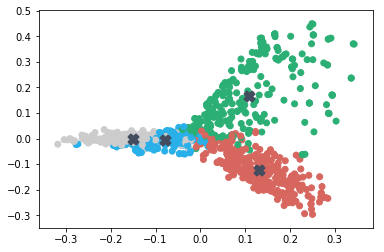

In [39]:
n_clusters_1 = 4
max_iter_1 = 50
# clustering
labels_1, pca_coords_1, centroids_1, pca_1, clf_1 = kmean_cluster(4, 50)
# plot
kmean_plot(labels_1, pca_coords_1, centroids_1, pca_1)

    Number of articles in each cluster:

In [40]:
# no of articles per cluster
np.bincount(labels_1)

array([284, 242, 310, 295])

    Summarising:

In [41]:
kmean_summary(clf_1, n_clusters_1)

Cluster 0:

20 most frequent words:
mobil use phone peopl said technolog user music comput digit servic softwar site game firm broadband tv net mr network 

No of articles:  284

Articles in cluster 0:
['article-mar-0597', 'article-mar-1403', 'article-dec-2079', 'article-sep-4359', 'article-nov-0594', 'article-may-2234', 'article-jan-4097', 'article-sep-0208', 'article-jan-2875', 'article-nov-3444', 'article-aug-4600', 'article-jul-4968', 'article-sep-3133', 'article-jan-1456', 'article-jul-2595', 'article-mar-2861', 'article-jul-1530', 'article-jan-2156', 'article-mar-3938', 'article-feb-1244', 'article-oct-3807', 'article-sep-2548', 'article-aug-4754', 'article-jul-2815', 'article-oct-4503', 'article-nov-3950', 'article-jan-4249', 'article-feb-0384', 'article-may-0416', 'article-nov-2717', 'article-nov-4908', 'article-dec-0136', 'article-jun-3235', 'article-dec-3182', 'article-feb-4657', 'article-apr-0938', 'article-oct-0374', 'article-may-4774', 'article-sep-4170', 'article-oct-0668

** Report: **  
From the above result, it can be concluded that:
    - Cluster 0 is related to "Technology" and "Digital devices", talking about gadgets and tech-savvy people
    - Cluster 1 is related to "Ireland Economy", talking about employment and income of irish people
    - Cluster 2 is related to "Sports" specifically about "Football", may be about a football match played by Liverpool and Chelsea
    - Cluster 3 is related to "Health", talking about children health, medical insurance, etc.
    
** All the related articles is also listed under each cluster **

#### ii) k-Mean with k = 3 and no. of iterations = 100

    Clustering and Plotting:

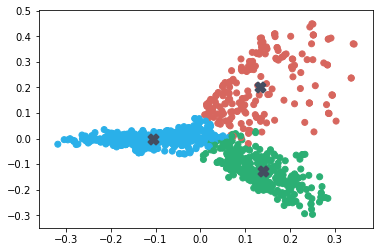

In [42]:
n_clusters_2 = 3
max_iter_2 = 100
# clustering
labels_2, pca_coords_2, centroids_2, pca_2, clf_2 = kmean_cluster(n_clusters_2, max_iter_2)
# plot
kmean_plot(labels_2, pca_coords_2, centroids_2, pca_2)

    Number of articles in each cluster:

In [43]:
# no of articles per cluster
np.bincount(labels_2)

array([640, 301, 190])

    Summarising:

In [44]:
kmean_summary(clf_2, n_clusters_2)

Cluster 0:

20 most frequent words:
game said player play peopl use mobil club chelsea phone technolog like year arsen new goal time win unit team 

No of articles:  640

Articles in cluster 0:
['article-aug-1576', 'article-aug-0545', 'article-mar-0597', 'article-may-3484', 'article-aug-4155', 'article-mar-0391', 'article-mar-1618', 'article-mar-1403', 'article-dec-2079', 'article-apr-0278', 'article-sep-4359', 'article-aug-0687', 'article-sep-2686', 'article-nov-0594', 'article-may-2234', 'article-jan-4097', 'article-oct-1023', 'article-sep-0208', 'article-jan-2875', 'article-jul-2837', 'article-oct-2736', 'article-nov-3444', 'article-aug-4600', 'article-nov-0369', 'article-apr-0834', 'article-apr-4454', 'article-jul-4968', 'article-sep-3133', 'article-nov-2507', 'article-apr-2676', 'article-jun-2013', 'article-oct-1936', 'article-mar-3151', 'article-jan-1456', 'article-jul-2595', 'article-may-1048', 'article-mar-2861', 'article-sep-0807', 'article-oct-4681', 'article-jul-1530', 'arti

** Report: **  
From the above result, it can be concluded that:
    - Cluster 0 is related to "Health", talking about children health, medical insurance, doctors, hospitals etc.
    - Cluster 1 is related to "Ireland's Economy", talking about economy growth, unemployment
    - Cluster 1 is related to "Technology" and "Sports", talking about gadgets, football clubs, new technlogies
    
** All the related articles is also listed for under each cluster **

### Hierarchical document clustering

In [45]:
# define the linkage_matrix using ward clustering pre-computed distances "Cosine Similarity"
linkage_matrix = ward(dist)

**Dedrogram: **

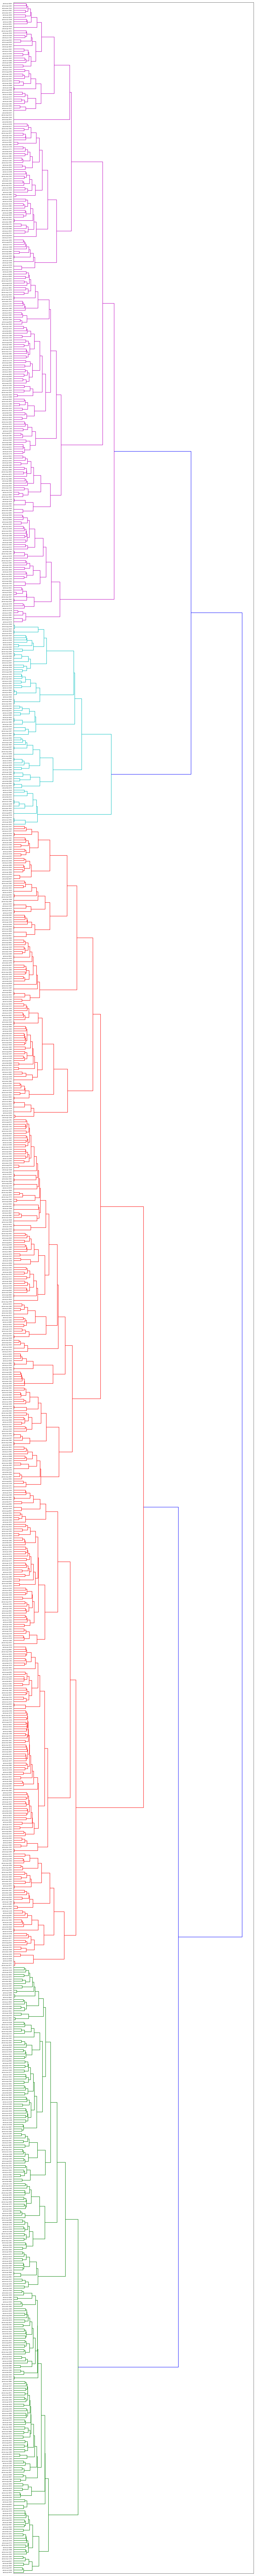

In [75]:
fig, ax = plt.subplots(figsize=(15, 150)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels = article_title);

plt.tick_params(axis= 'x', which='both', bottom='off', top='off', labelbottom='off')

plt.tight_layout() #show plot with tight layout

In [76]:
from scipy.cluster.hierarchy import fcluster

In [78]:
def hierarchy_cluster(no_of_clusters):
    clustering = fcluster(linkage_matrix, no_of_clusters, 'maxclust')
    
    # Linear dimensionality reduction
    pca = PCA(n_components=2).fit(tfidf_dense)
    pca_coords = pca.transform(tfidf_dense)

    plt.scatter(pca_coords[:, 0], pca_coords[:, 1], c=clustering, s=30, cmap='rainbow')
    return clustering

    For 3 cluster:
        - plot
        - data frame

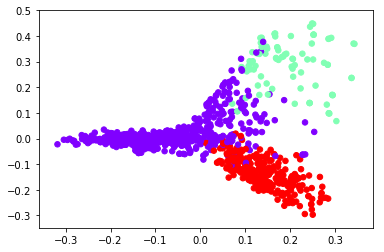

In [84]:
# plot
clustering_1 = hierarchy_cluster(3)

In [85]:
# dataframe
news_hc = {'title': article_title, 'cluster': clustering_1}
frame = pd.DataFrame(news_hc, index = [clustering_1] , columns = ['title', 'cluster'])
frame

,title,cluster
1,article-aug-1576,1
3,article-oct-2935,3
1,article-aug-0545,1
1,article-mar-0597,1
2,article-may-1267,2
1,article-may-3484,1
1,article-aug-4155,1
3,article-nov-3267,3
1,article-may-0386,1
1,article-mar-0391,1


    For 4 clusters:
        - plot
        - dataframe

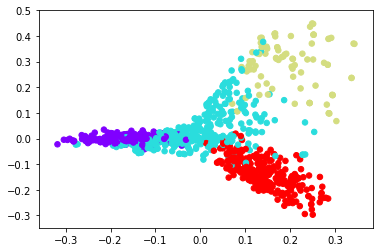

In [86]:
# plot
clustering_2 = hierarchy_cluster(4)

In [87]:
# data frame
news_hc = {'title': article_title, 'cluster': clustering_2}
frame = pd.DataFrame(news_hc, index = [clustering_2] , columns = ['title', 'cluster'])
frame

,title,cluster
1,article-aug-1576,1
4,article-oct-2935,4
1,article-aug-0545,1
2,article-mar-0597,2
3,article-may-1267,3
1,article-may-3484,1
1,article-aug-4155,1
4,article-nov-3267,4
2,article-may-0386,2
1,article-mar-0391,1


### Agglomerative Clustering

    Number of clusters = 3

In [97]:
Hclustering = AgglomerativeClustering(affinity = "euclidean", linkage = "complete", n_clusters = 3)
Hclustering.fit(tfidf_dense)
clustering = model.labels_

In [98]:
news_hc = {'title': article_title, 'cluster': clustering}
frame = pd.DataFrame(news_hc, index = [clustering] , columns = ['title', 'cluster'])
frame

,title,cluster
0,article-aug-1576,0
1,article-oct-2935,1
0,article-aug-0545,0
0,article-mar-0597,0
0,article-may-1267,0
0,article-may-3484,0
0,article-aug-4155,0
0,article-nov-3267,0
0,article-may-0386,0
0,article-mar-0391,0


** Remark **

Compared to K-means, agglomerative algorithms are more cumbersome and do not scale well to large datasets. Agglomerative algorithms are more suitable for statistical studies. These algorithms do offer the advantage of creating a complete range of nested cluster solutions.

K-Mean is a viable method for handling large datasets or even big data datasets  
K-Mean is fast, easy to understand, and available everywhere